In [22]:
import numpy as np
import matplotlib.pyplot as plt

import diff_sensor_structures
import sensors
import em_stoch
import subspace_methods

In [23]:
DIST_RATIO = 0.5

In [24]:
Num_sensors1 = 25
Num_emitters1 = 1
sample_size1 = 12
failing_sensors1 = np.array([0, 1, 2, 3, 4], dtype=np.int16)
gap_ratio1 = np.array([0.5, 0.5, 0.5, 0.5, 0.5], dtype=np.float32)
theta1_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Угловые координаты источников (DoA) в градусах
P_1 = 0.5 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация сигналов
Q_1 = 8.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шумов
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S1 = sensors.gss(Num_emitters1, sample_size1, P_1)
N1 = sensors.gss(Num_sensors1, sample_size1, Q_1)
X1 = (A1 @ S1.T + N1.T).T
X1_with_mv = sensors.MCAR(X1, failing_sensors1, gap_ratio1)
R1 = sensors.initial_Cov(X1_with_mv)
MUSIC_theta1 = subspace_methods.MUSIC_DoA(R1, Num_emitters1)

In [25]:
MUSIC_theta1

array([0.71558499])

In [26]:
sensors.SNR(A1, P_1, Q_1, metrics = 'avg', scale = 'linear')

np.float64(1.54320987654321)

In [27]:
EM_theta1_rad, EM_P1, lhd_1, lhd_list1, angles_list1 = em_stoch.multistart_EM2(X1_with_mv, 
                                                                               Num_emitters1, 
                                                                               Q=Q_1,
                                                                               MUSIC_theta=MUSIC_theta1, 
                                                                               num_of_starts=1, 
                                                                               max_iter=25, 
                                                                               rtol=1e-5)

0-th start
theta=[0.71558499],P=[[1.18642836e-07-1.98523347e-24j]]
Initial angles = [0.71558499]
likelihood is -870.3064393934375 on iteration 0
likelihood is -870.2116588216295 on iteration 1
likelihood is -870.1087062484354 on iteration 2
likelihood is -869.9924596557431 on iteration 3
likelihood is -869.8732939030208 on iteration 4
likelihood is -869.7416900615974 on iteration 5
likelihood is -869.5963628775382 on iteration 6
likelihood is -869.4299995033684 on iteration 7
likelihood is -869.2364530755277 on iteration 8
likelihood is -869.0029903873619 on iteration 9
likelihood is -868.7114391332607 on iteration 10
likelihood is -868.3318151881747 on iteration 11
likelihood is -867.8151548925955 on iteration 12
likelihood is -867.0761105886642 on iteration 13
likelihood is -865.9624249278967 on iteration 14
likelihood is -864.2045154841826 on iteration 15
likelihood is -861.3911328209829 on iteration 16
likelihood is -857.2672113603257 on iteration 17
likelihood is -852.884199009846

In [28]:
EM_theta1_rad, EM_P1

(array([0.69671571]), array([[1.28365194+0.j]]))

In [29]:
em_stoch.incomplete_lkhd(X1_with_mv, EM_theta1_rad, EM_P1, Q_1), em_stoch.incomplete_lkhd(X1_with_mv, theta1_rad, P_1, Q_1)

(np.float64(-850.5367269493806), np.float64(-852.4011191641745))

In [30]:
lhd_list1 = np.array(lhd_list1)
x1_lhd = np.arange(len(lhd_list1))

angles_list1 = np.rad2deg(np.array(angles_list1))
x1_angle = np.arange(len(angles_list1))

In [31]:
Num_sensors2 = 25
Num_emitters2 = 1
sample_size2 = 11
failing_sensors2 = np.array([0, 1, 2, 3, 4, 5, 6, 7], dtype=np.int16)
gap_ratio2 = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=np.float32)
theta2_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta2_deg = np.rad2deg(theta2_rad) # Угловые координаты источников (DoA) в градусах
P_2 = 0.5 * np.eye(Num_emitters2, dtype=np.float64) # Ковариация сигналов
Q_2 = 6.1 * np.eye(Num_sensors2, dtype=np.float64) # Ковариация шумов
A2 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors2).reshape(-1,1) * 
             np.sin(theta2_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S2 = sensors.gss(Num_emitters2, sample_size2, P_2)
N2 = sensors.gss(Num_sensors2, sample_size2, Q_2)
X2 = (A2 @ S2.T + N2.T).T
X2_with_mv = sensors.MCAR(X2, failing_sensors2, gap_ratio2)
R2 = sensors.initial_Cov(X2_with_mv)
MUSIC_theta2 = subspace_methods.MUSIC_DoA(R2, Num_emitters2)

In [32]:
MUSIC_theta2

array([0.72431164])

In [33]:
sensors.SNR(A2, P_2, Q_2, metrics = 'avg', scale = 'linear')

np.float64(2.0491803278688523)

In [34]:
EM_theta2_rad, EM_P2, lhd_2, lhd_list2, angles_list2 = em_stoch.multistart_EM2(X2_with_mv, 
                                                                               Num_emitters2, 
                                                                               Q=Q_2,
                                                                               MUSIC_theta=MUSIC_theta2, 
                                                                               num_of_starts=1, 
                                                                               max_iter=25, 
                                                                               rtol=1e-5)

0-th start
theta=[0.72431164],P=[[7.5917774e-08+4.13590306e-24j]]
Initial angles = [0.72431164]
likelihood is -689.483063070951 on iteration 0
likelihood is -689.3868727803281 on iteration 1
likelihood is -689.2711764210785 on iteration 2
likelihood is -689.1451653423012 on iteration 3
likelihood is -689.010842315475 on iteration 4
likelihood is -688.8603357481552 on iteration 5
likelihood is -688.691515967248 on iteration 6
likelihood is -688.4909411400195 on iteration 7
likelihood is -688.2441996330451 on iteration 8
likelihood is -687.9283827939915 on iteration 9
likelihood is -687.5008884934184 on iteration 10
likelihood is -686.8894817537507 on iteration 11
likelihood is -685.9634989679143 on iteration 12
likelihood is -684.4844884354717 on iteration 13
likelihood is -682.0722177651691 on iteration 14
likelihood is -678.473647185073 on iteration 15
likelihood is -674.7135693443931 on iteration 16
likelihood is -673.0830262114695 on iteration 17
best_start=0


In [35]:
EM_theta2_rad, EM_P2

(array([0.70184339]), array([[0.70993412+0.j]]))

In [36]:
em_stoch.incomplete_lkhd(X2_with_mv, EM_theta2_rad, EM_P2, Q_2), em_stoch.incomplete_lkhd(X2_with_mv, theta2_rad, P_2, Q_2)

(np.float64(-673.0830262114695), np.float64(-673.6467390084401))

In [37]:
lhd_list2 = np.array(lhd_list2)
x2_lhd = np.arange(len(lhd_list2))

angles_list2 = np.rad2deg(np.array(angles_list2))
x2_angle = np.arange(len(angles_list2))

In [38]:
angles_list2

array([[41.5       ],
       [41.5       ],
       [41.5       ],
       [41.23896078],
       [41.01355959],
       [40.86075762],
       [40.71295784],
       [40.62334791],
       [40.53741352],
       [40.46382989],
       [40.4199332 ],
       [40.37998117],
       [40.33951844],
       [40.30412616],
       [40.27782288],
       [40.25650257],
       [40.23980208],
       [40.2251213 ],
       [40.212664  ]])

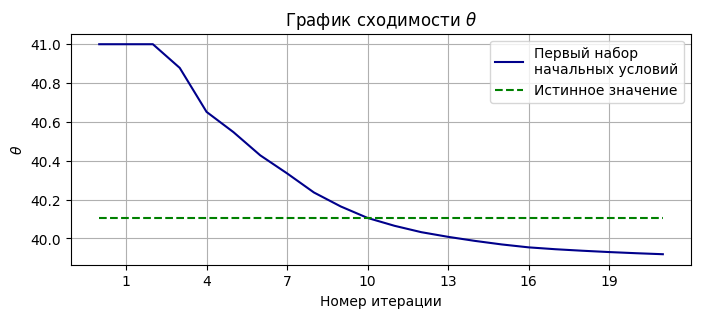

In [39]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1_angle, angles_list1,color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1_angle, np.tile(theta1_deg, len(angles_list1)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

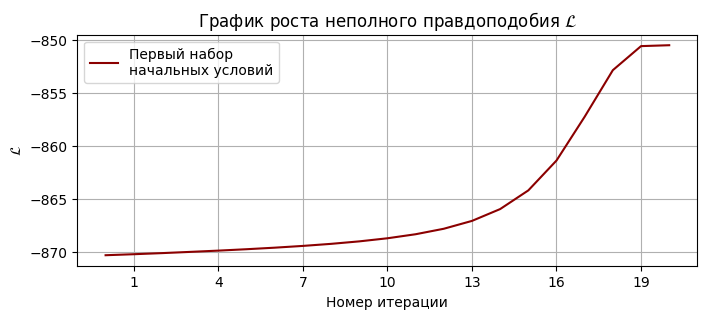

In [40]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x1_lhd, lhd_list1,color='darkred', label=f'Первый набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

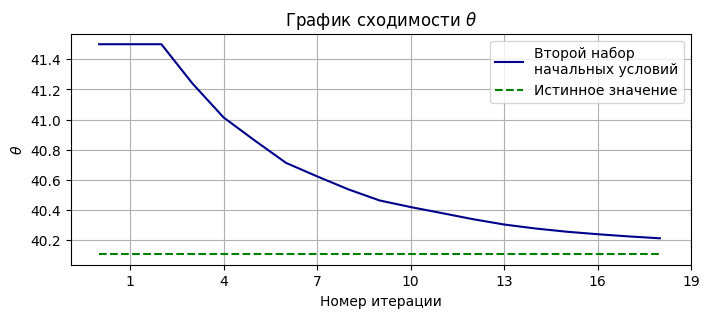

In [41]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x2_angle, angles_list2,color='darkblue', label=f'Второй набор\nначальных условий')
plt.plot(x2_angle, np.tile(theta2_deg, len(angles_list2)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()

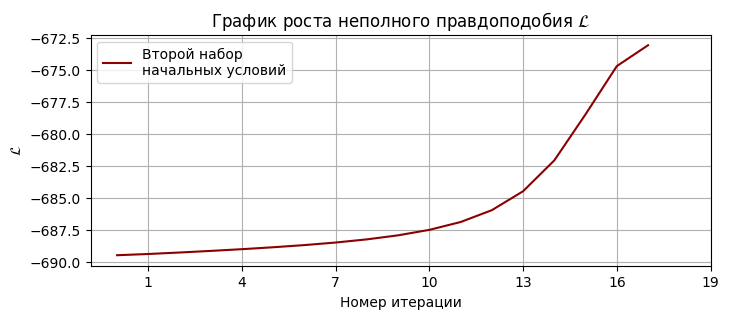

In [42]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x2_lhd, lhd_list2,color='darkred', label=f'Второй набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(np.arange(1,20,3))
plt.legend()
plt.grid()
plt.show()